In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
# Download the  RPS data set built using CGI by  Laurence Marooney

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-12-07 05:52:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 108.177.98.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   130MB/s    in 1.5s    

2020-12-07 05:52:26 (130 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-12-07 05:52:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/

In [3]:
# Unzip the downloaded zip files

import os
import zipfile

zip_file  = zipfile.ZipFile('/tmp/rps.zip')

zip_file.extractall('/tmp/')

zip_file.close()

zip_file  = zipfile.ZipFile('/tmp/rps-test-set.zip')

zip_file.extractall('/tmp/')

zip_file.close()




In [5]:
ls -ltr /tmp/rps/paper

total 67856
-rw-r--r-- 1 root root 74920 Dec  7 05:52 paper01-002.png
-rw-r--r-- 1 root root 74893 Dec  7 05:52 paper01-001.png
-rw-r--r-- 1 root root 74307 Dec  7 05:52 paper01-000.png
-rw-r--r-- 1 root root 77380 Dec  7 05:52 paper01-004.png
-rw-r--r-- 1 root root 77071 Dec  7 05:52 paper01-003.png
-rw-r--r-- 1 root root 78849 Dec  7 05:52 paper01-007.png
-rw-r--r-- 1 root root 79176 Dec  7 05:52 paper01-006.png
-rw-r--r-- 1 root root 78468 Dec  7 05:52 paper01-005.png
-rw-r--r-- 1 root root 67863 Dec  7 05:52 paper01-010.png
-rw-r--r-- 1 root root 76178 Dec  7 05:52 paper01-009.png
-rw-r--r-- 1 root root 77650 Dec  7 05:52 paper01-008.png
-rw-r--r-- 1 root root 77701 Dec  7 05:52 paper01-014.png
-rw-r--r-- 1 root root 70081 Dec  7 05:52 paper01-013.png
-rw-r--r-- 1 root root 74866 Dec  7 05:52 paper01-012.png
-rw-r--r-- 1 root root 74359 Dec  7 05:52 paper01-011.png
-rw-r--r-- 1 root root 79609 Dec  7 05:52 paper01-017.png
-rw-r--r-- 1 root root 79451 Dec  7 05:52 paper01-016.png
-r

In [ ]:
# Check the number of images for rock, paper and scissors

print ('Number of rock images: ', len(os.listdir('/tmp/rps/rock')))

print ('Number of paper images: ', len(os.listdir('/tmp/rps/paper')))

print ('Number of scissors images: ', len(os.listdir('/tmp/rps/scissors')))

Number of rock images:  840
Number of paper images:  840
Number of scissors images:  840


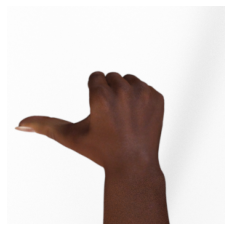

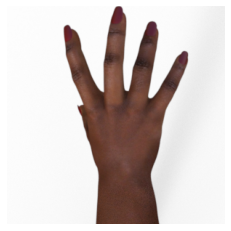

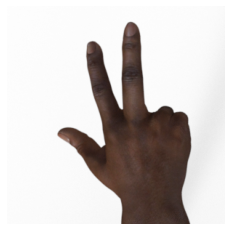

In [ ]:
#  View a few images using matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

rock_images = os.listdir('/tmp/rps/rock')

paper_images = os.listdir('/tmp/rps/paper')

scissors_images = os.listdir('/tmp/rps/scissors')

rock_images  = ['/tmp/rps/rock/' + rock_image for rock_image in rock_images]

paper_images  = ['/tmp/rps/paper/' + paper_image for paper_image in paper_images]

scissors_images  = ['/tmp/rps/scissors/' + scissors_image for scissors_image in scissors_images]

for img_path in [rock_images[0],paper_images[0],scissors_images[0]]:
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
# Building your training and validation Data Generators

training_dir = '/tmp/rps/'


training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0,
                                                                   rotation_range = 50,
                                                                   width_shift_range = 0.3,
                                                                   height_shift_range = 0.3,
                                                                   shear_range =0.3,
                                                                   vertical_flip = True,
                                                                   fill_mode = 'nearest'
                                                                   )

training_generator = training_datagen.flow_from_directory(training_dir,
                                                          batch_size = 64,
                                                          target_size = (150,150),
                                                          class_mode ='categorical')


validation_dir = '/tmp/rps-test-set'


validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.0)


validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                          batch_size = 64,
                                                          target_size = (150,150),
                                                          class_mode ='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
# Define your deep CNN architecture

model = tf.keras.models.Sequential([
    # Note the input shape is 150x150 with 3 layers for color
    # This is the first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit data into the model


history = model.fit(training_generator,
                    epochs = 25,
                    validation_data=validation_generator)

Epoch 1/25
40/40 [==============================] - 22s 544ms/step - loss: 1.1533 - accuracy: 0.3222 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 2/25
40/40 [==============================] - 21s 535ms/step - loss: 1.0999 - accuracy: 0.3409 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 3/25
40/40 [==============================] - 22s 547ms/step - loss: 1.0984 - accuracy: 0.3528 - val_loss: 1.0958 - val_accuracy: 0.3333
Epoch 4/25
40/40 [==============================] - 21s 533ms/step - loss: 1.0840 - accuracy: 0.3802 - val_loss: 1.0437 - val_accuracy: 0.4866
Epoch 5/25
40/40 [==============================] - 21s 528ms/step - loss: 1.0266 - accuracy: 0.4472 - val_loss: 0.9463 - val_accuracy: 0.4355
Epoch 6/25
40/40 [==============================] - 21s 527ms/step - loss: 1.1136 - accuracy: 0.3746 - val_loss: 1.0892 - val_accuracy: 0.3333
Epoch 7/25
40/40 [==============================] - 21s 520ms/step - loss: 1.0313 - accuracy: 0.4508 - val_loss: 0.7701 - val_accuracy: 0.7097

<function matplotlib.pyplot.show>

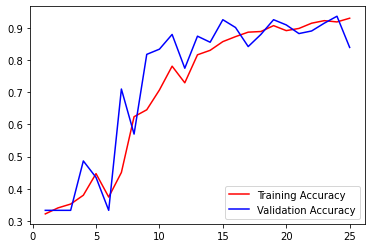

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']

loss = history.history['loss']

val_accuracy = history.history['val_accuracy']

val_loss = history.history['val_loss']

epochs = range (1,26)

plt.plot(epochs,accuracy,'r',label='Training Accuracy')

plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')

plt.legend()

plt.figure()

plt.show


In [ ]:
# Download images for validation

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip \
    -O /tmp/rps-validation.zip

--2020-08-06 04:56:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6623597 (6.3M) [application/zip]
Saving to: ‘/tmp/rps-validation.zip’

/tmp/rps-validation 100%[===================>]   6.32M  19.2MB/s    in 0.3s    

2020-08-06 04:56:27 (19.2 MB/s) - ‘/tmp/rps-validation.zip’ saved [6623597/6623597]



In [ ]:
# Unzip the downloaded set of images

zip_file  = zipfile.ZipFile('/tmp/rps-validation.zip')

!mkdir /tmp/rps-validation-dir

zip_file.extractall('/tmp/rps-validation-dir/')

zip_file.close()

In [ ]:
# Check the classifier using images

#from google.colab import files
from keras.preprocessing import image

validation_images = ['/tmp/rps-validation-dir/' + fname for fname in os.listdir('/tmp/rps-validation-dir/')]

for fn in validation_images:
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

/tmp/rps-validation-dir/rock3.png
[[0. 1. 0.]]
/tmp/rps-validation-dir/scissors3.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/rock1.png
[[0. 1. 0.]]
/tmp/rps-validation-dir/paper-hires1.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/scissors2.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/paper4.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/scissors7.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/scissors1.png
[[0. 0. 1.]]
/tmp/rps-validation-dir/rock9.png
[[3.9735645e-26 1.0000000e+00 0.0000000e+00]]
/tmp/rps-validation-dir/scissors6.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/paper1.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/rock5.png
[[0. 0. 1.]]
/tmp/rps-validation-dir/scissors-hires1.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/paper-hires2.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/scissors-hires2.png
[[0. 0. 1.]]
/tmp/rps-validation-dir/rock8.png
[[0. 1. 0.]]
/tmp/rps-validation-dir/paper5.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/paper7.png
[[1. 0. 0.]]
/tmp/rps-validation-dir/scissors8.png
[[1. 0. 0.]]
/tmp/rps-val

In [ ]:
# Classes indices are assigned in an alphabetical order

validation_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}